Skład grupy:
    Paweł Awramiuk
    Anna Chojnowska
    Piotr Grusza
    Szymon Leszczyński

In [1]:
## Polecenia do instalacji pakietów
# conda install -c conda-forge tensorflow
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models, layers

## Konfiguracje globalne
# Formatowanie liczb w DataFrame
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
data_ALL = pd.read_csv("data_ALL.csv")
data_ALL

,Unnamed: 0,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,...,city_katowice,city_krakow,city_lodz,city_lublin,city_poznan,city_radom,city_rzeszow,city_szczecin,city_warszawa,city_wroclaw
0,1345,-0.59,-0.74,0.14,0.64,1.00,-1.46,0.10,0.57,-0.78,...,0,1,0,0,0,0,0,0,0,0
1,1346,-0.82,-0.74,-0.58,-0.73,1.00,-1.46,0.11,0.26,-0.88,...,0,1,0,0,0,0,0,0,0,0
2,1347,0.78,0.55,0.14,-1.19,-0.02,-1.43,0.13,-1.43,0.73,...,0,1,0,0,0,0,0,0,0,0
3,1348,1.02,0.55,0.14,-0.28,-0.02,-1.46,0.18,1.10,-0.50,...,0,1,0,0,0,0,0,0,0,0
4,1349,-0.12,-0.74,-1.31,-1.19,-0.02,-1.41,0.13,-1.10,2.06,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35075,51303,2.51,0.55,0.14,-0.73,-2.47,1.05,-1.07,-1.54,3.30,...,0,0,0,0,0,0,0,0,0,0
35076,51305,2.09,1.85,-0.58,-1.19,0.92,1.06,-1.05,-0.64,-0.12,...,0,0,0,0,0,0,0,0,0,0
35077,51307,2.23,1.85,0.14,-1.19,-2.01,1.05,-1.08,-1.55,1.40,...,0,0,0,0,0,0,0,0,0,0
35078,51309,2.29,1.85,0.14,-1.19,0.28,1.04,-1.10,-0.59,-0.50,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data_ALL.drop(columns=['Unnamed: 0'], inplace=True)
data_ALL

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,hasParkingSpace,...,city_katowice,city_krakow,city_lodz,city_lublin,city_poznan,city_radom,city_rzeszow,city_szczecin,city_warszawa,city_wroclaw
0,-0.59,-0.74,0.14,0.64,1.00,-1.46,0.10,0.57,-0.78,0,...,0,1,0,0,0,0,0,0,0,0
1,-0.82,-0.74,-0.58,-0.73,1.00,-1.46,0.11,0.26,-0.88,0,...,0,1,0,0,0,0,0,0,0,0
2,0.78,0.55,0.14,-1.19,-0.02,-1.43,0.13,-1.43,0.73,0,...,0,1,0,0,0,0,0,0,0,0
3,1.02,0.55,0.14,-0.28,-0.02,-1.46,0.18,1.10,-0.50,0,...,0,1,0,0,0,0,0,0,0,0
4,-0.12,-0.74,-1.31,-1.19,-0.02,-1.41,0.13,-1.10,2.06,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35075,2.51,0.55,0.14,-0.73,-2.47,1.05,-1.07,-1.54,3.30,0,...,0,0,0,0,0,0,0,0,0,0
35076,2.09,1.85,-0.58,-1.19,0.92,1.06,-1.05,-0.64,-0.12,1,...,0,0,0,0,0,0,0,0,0,0
35077,2.23,1.85,0.14,-1.19,-2.01,1.05,-1.08,-1.55,1.40,0,...,0,0,0,0,0,0,0,0,0,0
35078,2.29,1.85,0.14,-1.19,0.28,1.04,-1.10,-0.59,-0.50,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_dataset = data_ALL.sample(frac=0.8, random_state=0)
test_dataset = data_ALL.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

In [5]:
#sns.pairplot(train_dataset[['price', 'floor', 'squareMeters', 'centreDistance']], diag_kind='kde')

In [6]:
train_features = tf.convert_to_tensor(train_features)
test_features = tf.convert_to_tensor(test_features)

In [7]:
model = models.Sequential(
[
    layers.InputLayer(input_shape=32,),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='linear')
])

model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='mean_absolute_error',
    metrics=['mean_absolute_percentage_error', 'mean_squared_error', 'logcosh'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              33792     
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 256)               6

In [8]:
history = model.fit(
    train_features,
    train_labels,
    epochs=130,
    validation_data = (test_features, test_labels))

Epoch 1/130
877/877 [==============================] - 6s 5ms/step - loss: 126524.0078 - mean_absolute_percentage_error: 18.6058 - mean_squared_error: 41781469184.0000 - logcosh: 126523.3125 - val_loss: 96630.1641 - val_mean_absolute_percentage_error: 13.6847 - val_mean_squared_error: 20662927360.0000 - val_logcosh: 96629.5078
Epoch 2/130
877/877 [==============================] - 5s 5ms/step - loss: 98477.1875 - mean_absolute_percentage_error: 14.3143 - mean_squared_error: 21146230784.0000 - logcosh: 98476.3984 - val_loss: 93122.0312 - val_mean_absolute_percentage_error: 13.0499 - val_mean_squared_error: 19614285824.0000 - val_logcosh: 93121.3516
Epoch 3/130
877/877 [==============================] - 5s 5ms/step - loss: 95236.5859 - mean_absolute_percentage_error: 13.8038 - mean_squared_error: 20053569536.0000 - logcosh: 95235.9688 - val_loss: 97619.4922 - val_mean_absolute_percentage_error: 13.4677 - val_mean_squared_error: 21180590080.0000 - val_logcosh: 97618.7891
Epoch 4/130
877/8

Epoch 26/130
877/877 [==============================] - 5s 5ms/step - loss: 78686.9297 - mean_absolute_percentage_error: 11.3610 - mean_squared_error: 14540917760.0000 - logcosh: 78686.2188 - val_loss: 82978.3047 - val_mean_absolute_percentage_error: 11.8367 - val_mean_squared_error: 15877928960.0000 - val_logcosh: 82977.6328
Epoch 27/130
877/877 [==============================] - 5s 5ms/step - loss: 80604.4453 - mean_absolute_percentage_error: 11.6572 - mean_squared_error: 15088262144.0000 - logcosh: 80603.8125 - val_loss: 86619.1719 - val_mean_absolute_percentage_error: 11.9428 - val_mean_squared_error: 17345738752.0000 - val_logcosh: 86618.4922
Epoch 28/130
877/877 [==============================] - 5s 5ms/step - loss: 78546.7734 - mean_absolute_percentage_error: 11.3626 - mean_squared_error: 14510860288.0000 - logcosh: 78546.0859 - val_loss: 85750.4375 - val_mean_absolute_percentage_error: 12.8406 - val_mean_squared_error: 16086587392.0000 - val_logcosh: 85749.7109
Epoch 29/130
877

Epoch 51/130
877/877 [==============================] - 5s 5ms/step - loss: 68620.0625 - mean_absolute_percentage_error: 10.0372 - mean_squared_error: 11342595072.0000 - logcosh: 68619.3438 - val_loss: 77734.1641 - val_mean_absolute_percentage_error: 11.3384 - val_mean_squared_error: 14056117248.0000 - val_logcosh: 77733.4531
Epoch 52/130
877/877 [==============================] - 5s 5ms/step - loss: 68189.9375 - mean_absolute_percentage_error: 9.9644 - mean_squared_error: 11194381312.0000 - logcosh: 68189.2578 - val_loss: 80221.7031 - val_mean_absolute_percentage_error: 12.1491 - val_mean_squared_error: 14117483520.0000 - val_logcosh: 80221.0391
Epoch 53/130
877/877 [==============================] - 5s 5ms/step - loss: 67488.6562 - mean_absolute_percentage_error: 9.8811 - mean_squared_error: 11019105280.0000 - logcosh: 67487.9297 - val_loss: 80380.2656 - val_mean_absolute_percentage_error: 11.2718 - val_mean_squared_error: 15386492928.0000 - val_logcosh: 80379.5469
Epoch 54/130
877/8

877/877 [==============================] - 5s 5ms/step - loss: 57730.9062 - mean_absolute_percentage_error: 8.4634 - mean_squared_error: 8467574272.0000 - logcosh: 57730.1875 - val_loss: 71913.8906 - val_mean_absolute_percentage_error: 10.3908 - val_mean_squared_error: 12730262528.0000 - val_logcosh: 71913.2031
Epoch 77/130
877/877 [==============================] - 5s 5ms/step - loss: 56762.4453 - mean_absolute_percentage_error: 8.3201 - mean_squared_error: 8258220544.0000 - logcosh: 56761.7500 - val_loss: 72714.2500 - val_mean_absolute_percentage_error: 10.3906 - val_mean_squared_error: 13048721408.0000 - val_logcosh: 72713.5391
Epoch 78/130
877/877 [==============================] - 5s 5ms/step - loss: 56860.1250 - mean_absolute_percentage_error: 8.3561 - mean_squared_error: 8200010752.0000 - logcosh: 56859.4062 - val_loss: 72525.7344 - val_mean_absolute_percentage_error: 10.6311 - val_mean_squared_error: 12594890752.0000 - val_logcosh: 72525.0938
Epoch 79/130
877/877 [=============

877/877 [==============================] - 5s 5ms/step - loss: 47285.1953 - mean_absolute_percentage_error: 6.9221 - mean_squared_error: 6087327232.0000 - logcosh: 47284.4414 - val_loss: 68845.3203 - val_mean_absolute_percentage_error: 9.9231 - val_mean_squared_error: 12009583616.0000 - val_logcosh: 68844.5938
Epoch 102/130
877/877 [==============================] - 5s 5ms/step - loss: 47192.2891 - mean_absolute_percentage_error: 6.9375 - mean_squared_error: 5970452992.0000 - logcosh: 47191.5547 - val_loss: 68005.5000 - val_mean_absolute_percentage_error: 9.9844 - val_mean_squared_error: 11514819584.0000 - val_logcosh: 68004.8203
Epoch 103/130
877/877 [==============================] - 5s 5ms/step - loss: 46659.7461 - mean_absolute_percentage_error: 6.8467 - mean_squared_error: 5886216704.0000 - logcosh: 46659.0859 - val_loss: 68460.3438 - val_mean_absolute_percentage_error: 10.2323 - val_mean_squared_error: 11098910720.0000 - val_logcosh: 68459.6875
Epoch 104/130
877/877 [============

877/877 [==============================] - 5s 5ms/step - loss: 40262.3203 - mean_absolute_percentage_error: 5.9067 - mean_squared_error: 4478331904.0000 - logcosh: 40261.6367 - val_loss: 63022.0664 - val_mean_absolute_percentage_error: 9.2872 - val_mean_squared_error: 10320809984.0000 - val_logcosh: 63021.3633
Epoch 127/130
877/877 [==============================] - 5s 5ms/step - loss: 39483.1680 - mean_absolute_percentage_error: 5.8198 - mean_squared_error: 4371668480.0000 - logcosh: 39482.4688 - val_loss: 64256.3281 - val_mean_absolute_percentage_error: 9.4394 - val_mean_squared_error: 10701536256.0000 - val_logcosh: 64255.6172
Epoch 128/130
877/877 [==============================] - 5s 5ms/step - loss: 40340.8984 - mean_absolute_percentage_error: 5.9189 - mean_squared_error: 4459323904.0000 - logcosh: 40340.2109 - val_loss: 64666.9648 - val_mean_absolute_percentage_error: 9.5165 - val_mean_squared_error: 10770845696.0000 - val_logcosh: 64666.2344
Epoch 129/130
877/877 [=============

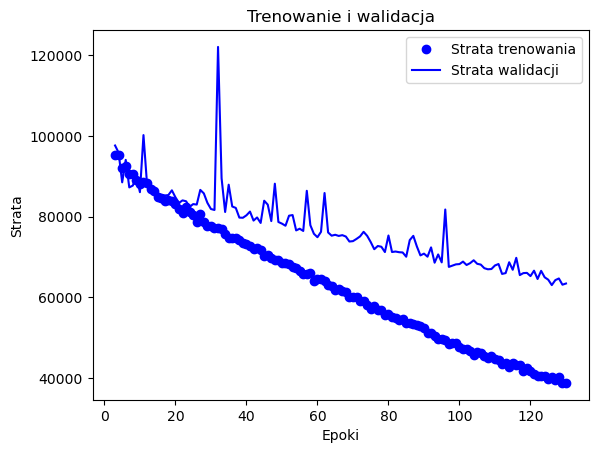

In [9]:
loss = history.history['loss'][2:]
val_loss = history.history['val_loss'][2:]
epochs = range(3, len(loss) + 3)
plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Trenowanie i walidacja')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()

In [10]:
score = model.evaluate(test_features, test_labels)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

220/220 [==============================] - 0s 2ms/step - loss: 63415.2852 - mean_absolute_percentage_error: 9.4123 - mean_squared_error: 10268407808.0000 - logcosh: 63414.6289
Test loss:  63415.28515625
Test accuracy:  9.412283897399902


In [11]:
predictions = model.predict(test_features)
print('Prediction: ', predictions[27])
print('Expected: ', test_labels.to_numpy()[27])

220/220 [==============================] - 1s 2ms/step
Prediction:  [560185.4]
Expected:  550000


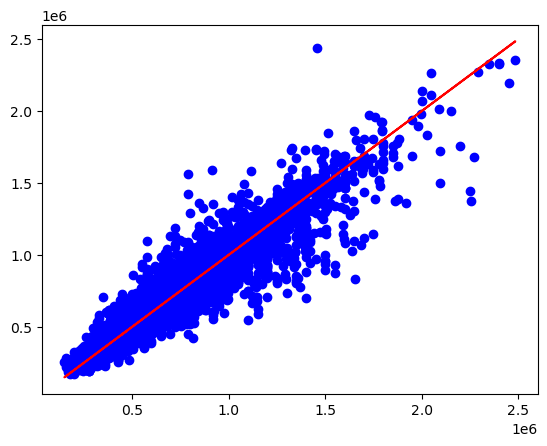

In [12]:
plt.plot(test_labels.to_numpy(), predictions, 'bo')
plt.plot(test_labels.to_numpy(), test_labels.to_numpy(), 'r')
plt.show()

In [13]:
model.save('regression2.keras')